# Trabalho Prático de Introdução a Banco de Dados - Dota 2

### Nomes: 
    Gabriel Henrique Souto Pires
    Raydan Elias Gaspar

# Table of Contents
1. [Diagrama entidade-relacionamento](#Diagrama-entidade-relacionamento)
2. [Esquema relacional](#Esquema-relacional)
3. [Dados](#Dados)
4. [Criação do banco de dados](#Criação-do-BD)
5. [Inserção dos dados](#Inserção-dos-dados)
6. [Consultas realizadas](#Consultas-realizadas)
    * [Seleção e projeção](#Seleção-e-projeção)
        * [Posição das wards colocadas pelos jogadores](#Consulta:-Posição-das-wards-colocadas-pelos-jogadores)
        * [Posição nas lanes de acordo com cada time em uma partida específica](#Consulta:-Posição-nas-lanes-de-acordo-com-cada-time-em-uma-partida-específica)
   
    * [Junção de duas relações](#Junção-de-duas-relações)
        * [Saldo de kills e resultado das partidas - Junção de duas relações](#Consulta:-Saldo-de-kills-e-resultado-das-partidas)
        * [Quantidade de mensagens ao longo da partida](#Consulta:-Quantidade-de-mensagens-ao-longo-da-partida)

![](img/dota_logo.png)

# Tema

Dota 2 é um jogo eletrônico do gênero Multiplayer Online Battle Arena (MOBA, "arena de batalha multijogador online"), também conhecido como Action Real-Time Strategy (ARTS, "estratégia de ação em tempo real") onde o jogador controla um personagem em uma batalha entre dois times, cujo objetivo é derrotar a equipe adversária e, para isso, é, indispensavelmente, necessário destruir o Ancestral (Ancient), que, por sua vez, se localiza no centro da base inimiga. Cada base é defendida por torres e ondas de unidades (chamadas de creeps) que percorrem os caminhos principais do mapa (chamadas de trilhas, ou lanes) que levam à suas bases. Existem 3 trilhas no mapa do jogo, que por convenção são chamadas de trilha de cima (Top, atravessa a parte de cima do mapa), trilha do meio (Mid ou Middle, caminho que atravessa o centro do mapa) e trilha de baixo (Bot ou Bottom, caminho que atravessa a parte de baixo do mapa). 

Na imagem abaixo podemos ver o minimapa do Dota2 e ao lado um diagrama representando o layout de um jogo do gênero MOBA, onde os pontos roxos e rosas representam as torres de cada time, com exceção do maior ponto localizado nos cantos da imagem dentro de cada base, que representa o Ancient.

| <br><img src="img/minimaps.png" width=700px /> |
|:--:| 
| **Figura 1**: Minimapa do Dota 2 (esquerda) e layout padrão de jogos MOBA (direita) |

# Dados
Os dados foram coletados utilizando a API não oficial do jogo, chamada OpenDoTA, nela coletamos dados de várias partidas do ano de 2015, assim como os dados dos jogadores presentes em cada partida e todas as suas ações, como por exemplo as coordenadas das posições que o jogador passou durante a partida, o herói que escolheu, quantas vezes morreu, entre outros. Os dados coletados foram disponibilizados em formato json, e não em formato de tabelas como precisávamos, então foi preciso selecionar os dados que queríamos entre aqueles fornecidos pela API e montar um banco de dados a partir deles. 

Uma característica do formato json é usar o tipo abstrato de dados dicionário, que é composto de pares de chaves e valores, onde cada chave pode conter uma lista de outras chaves e seus valores, isso faz com que existam várias "sub-tabelas" nos dados, o que impossibilita a importação dos dados diretamente para um banco de dados convencional. Dessa forma, foram criadas tabelas separadas para cada conjunto de valores do json, sendo que cada tabela referencia o seu "pai" original através de chaves estrangeiras, dessa forma conseguimos manter a relação dos dados como era originalmente feito no json.

Um exemplo dos dados pode ser visto na imagem abaixo.

| ![](img/exemplo_json.png) |
|:--:| 
| **Figura 2**: Amostra dos dados coletados em formato json |

Alguns dados não podiam ser buscados através da API, como por exemplo os nomes e números identificadores de cada personagem ou item do jogo, que são informações constantes, que não mudam entre as partidas, mas precisávamos dessas informações uma vez que a maior parte dos dados é numérica, e não seria interessante ter apenas números, mas sim nomes e significados para que os dados fizessem mais sentido. Por fim encontramos esses dados também em formato json, compatíveis com os dados da API, o que fez com que ficasse mais natural a relação entre as informações.

A imagem abaixo mostra um exemplo dos dados constantes de itens do jogo, com o id e nome de cada item listado em formato json.

| ![](img/exemplo_constantes.png) | 
|:--:| 
| **Figura 3**:  Dados constantes do jogo, servem de referência para os dados das partidas |

# Criação do banco de dados

Para criar o banco de dados baseado nas informações em json, primeiro escolhemos quais partes dos dados seriam utilizadas, uma vez que a quantidade de dados é muito extensa, e ficaria inviável modelar e inserir os dados em sua totalidade em um banco de dados devido à limitações de tempo. Depois disso foi decidido o que se tornaria tabela e o que se tornaria atributo. Seguimos um padrão no qual todas as chaves do json que possuíam uma lista de valores, se tornariam tabelas, e essas tabelas seriam relacionadas à tabela acima na hierarquia por meio de chaves estrangeiras. Usando como referência os dados da Figura 2, podemos ver que a parte referente aos dados da partida possui uma chave *"players"*, que por sua vez possui várias informações pontuais e tambem possui chaves com listas e outras informações. Cada uma dessas chaves que possuem mais de um valor seriam candidatas para serem transformadas em tabelas, como pode ser visto no exemplo da imagem abaixo, onde a chave referente à partida (match) possui uma chave com vários valores chamada "players", nesse caso players se tornou uma tabela separada de match, relacionada à match por uma chave estrangeira.

| ![](img/json_e_diagrama.png) |
|:--:| 
| **Figura 4**:  Recorte do diagrama e dos dados para ilustrar o mapeamento do json para banco de dados relacional |

Por fim optamos por criar 20 tabelas, que contém desde informações das ações dos jogadores em cada partida, até o nome dos heróis e itens do jogo, passando claro pelas informações das partidas como time vencedor, duração em segundos, entre outros.

# Especificação

https://homepages.dcc.ufmg.br/~mirella/DCC011/aula19-TPfinal.pdf

### Itens a serem apresentados:

* ✔️Diagrama entidade-relacionamento
    * ✔️Pelo menos 4 tipos de entidade, cada tipo com ao menos 2 atributos (além de atributo identificador)
    * ✔️Pelo menos 3 tipos de relacionamento, ao menos um com cardinalidade M:N
        * (Match--m-<>-n--Player)
    * ✔️Pode ser necessário alterar os dados originais para atender a esses requisitos
* ✔️Esquema relacional
* ✔️Dados inseridos
* Consultas realizadas
    * Deverão ser especificadas e executadas um total de 10 consultas em SQL, sendo:
        * ✔️2 operações de seleção e projeção 
        * ✔️3 junção de duas relações 
        * ✔️3 junção de três ou mais relações 
        * ✔️2 funções de agregação sobre o resultado da junção de pelo menos duas relações
    * Descrição textual + comando SQL (+resultado)

### Características avançadas

* A segunda metade da avaliação deste trabalho considera **três dessas quatro** opções:

    * avaliação de eficiência das consultas (cada uma das 10 consultas especificadas é formulada de pelo menos 2 formas) 
    * ii.dados e consultas mais interessantes, com dados de tipo não-convencional
    * iii.mais três consultas do tipo relatório 
    * iv.interface gráfica (e.g., um website) para visualização interativados dados  NOTA: pontos extras se o grupo optar por realizar as quatro opções
    
### Relatório final 24/06

* O relatório final deve conter: 
    * Descrição textual do banco de dados
    * Diagramas ER e Relacional
    * Consultas realizadas com explicação textual e respectivo comando SQL
    * Descrição das atividades realizadas individualmente por participante do grupo.

**03/07**: Última chance para entregar o relatório (com possíveis correções e complementações, e.g., interface).

### Apresentação 24 e 26/06

* Cada grupo terá em torno de 10 min (a confirmar, dependendo do número de grupos) para apresentar:
    * Tema do trabalho
    * Modelagem desenvolvida (conceitual e relacional)
    * Uma seleção das várias consultas formuladas e de seus resultados, 
    * Demonstração da interface (se tiver sido desenvolvida).

# Diagrama entidade-relacionamento

Para a criação do diagrama entidade-relacionamento, utilizamos o software *brModelo*, que foi indicado pela professora em sala durante a discussão do trabalho final. O brModelo usa a notação do livro do Prof. Heuser, que é um pouco diferente da que foi vista em sala de aula, mas achamos bem intuitivo e conseguimos modelar o banco sem muitos problemas.

Abaixo podemos ver o diagrama criado para o nosso banco.

| ![](DiagramaER/diagrama_er.png) |
|:--:| 
| **Figura 5**:  Diagrama entidade-relacionamento |

# Esquema relacional

Para criar o esquema relacional, tivemos vários problemas com algumas ferramentas como o site erdplus.com, também indicado pela professora, e ao tentar utilizar ferramentas mais manuais como o site draw.io, vimos que levaria muito mais tempo do que nós tínhamos disponível. Por esse motivo, optamos por utilizar uma ferramenta mais profissional, no caso o MySQL Workbench, isso agilizou bastante o processo e nos ajudou a não cometer erros no diagrama, uma vez que essa é uma ferramenta especializada em banco de dados.

Para armazenar os dados, optamos por utilizar a biblioteca sqlite3 do python, que foi mostrada na aula ministrada pela nossa monitora, já que é mais prático manter os dados em um arquivo ao invés de utilizar um servidor MySQL. Uma limitação do MySQL Workbench era exportar o modelo apenas no padrão SQL do MySQL, e após alguns testes, vimos que esse padrão não era compatível com a sintaxe do SQLite. Para resolver esse problema, utilizamos um plugin do MySQL Workbench chamado ExportSQLite, que exporta o modelo relacional criado diretamente para código SQL compatível com SQLite.

Após feita a modelagem e criação do código em SQL para criação do banco, começamos a utilizar o Jupyter-Notebook para ler os dados dos arquivos json

| ![](ModeloER/esquema_relacional.png) |
|:--:| 
| **Figura 6**:  Esquema relacional |

# Referências

Dota 2 Wikipedia: https://en.wikipedia.org/wiki/Dota_2 <br>
MOBA: https://en.wikipedia.org/wiki/Multiplayer_online_battle_arena <br>
OpenDoTA API: https://docs.opendota.com/ <br>
Descrição dos dados: https://wiki.teamfortress.com/wiki/WebAPI/GetMatchDetails <br>
brModelo: http://www.sis4.com/brModelo/ <br>
MySQL Workbench: https://www.mysql.com/products/workbench/ <br>
Plugin do MySQL Workbench (exportar para SQLite): https://github.com/tatsushid/mysql-wb-exportsqlite <br>

# Código

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import io
import sqlite3
import json

# Dados

In [2]:
with open('dota2_2800_partidas.json', 'r', encoding="utf8") as game_data:
    json_data = json.load(game_data)

MemoryError: 

# Criação do BD

In [64]:
conn = sqlite3.connect('SQL/dota2_791_partidas.db')
cursor = conn.cursor()

In [65]:
f = io.open('SQL/Banco_Dota2.sql', 'r')
sql = f.read()
cursor.executescript(sql)

# Inserção dos dados

In [66]:
#Dados do lobby_type.json
with open('json/lobby_type.json') as lobby_type_json:
    lobby_type_data = json.load(lobby_type_json)
    for l_id in lobby_type_data:
        lobby_type_id = lobby_type_data[l_id]['id']
        lobby_type_name = lobby_type_data[l_id]['name']
        #print(lobby_type_id,lobby_type_name)
        #INSERT
        cursor.execute('''INSERT INTO lobby_type (id,name) VALUES(?,?)''', (lobby_type_id,lobby_type_name))

#Dados do game_mode.json
with open('json/game_mode.json') as game_mode_json:
    game_mode_data = json.load(game_mode_json)
    for g_id in game_mode_data:
        game_mode_id = game_mode_data[g_id]['id']
        game_mode_name = game_mode_data[g_id]['name']
        #print(game_mode_id,game_mode_name)
        #INSERT
        cursor.execute('''INSERT INTO game_mode (id,name) VALUES(?,?)''', (game_mode_id,game_mode_name))

#Dados do order_types.json
with open('json/order_types.json') as order_types_json:
    order_types_data = json.load(order_types_json)
    for o_id in order_types_data:
        order_type_id = o_id
        order_type_name = order_types_data[o_id]
        #print(order_type_id, order_type_name)
        #INSERT
        cursor.execute('''INSERT INTO order_types (id,name) VALUES(?,?)''', (order_type_id,order_type_name))

#Dados do gold_reasons.json
with open('json/gold_reasons.json') as gold_reasons_json:
    gold_reasons_data = json.load(gold_reasons_json)
    for gold_id in gold_reasons_data:
        gold_reasons_id = gold_id
        gold_reasons_name = gold_reasons_data[gold_id]['name']
        #print(gold_reasons_id,gold_reasons_name)
        #INSERT
        cursor.execute('''INSERT INTO gold_reasons (id,name) VALUES(?,?)''', (gold_reasons_id,gold_reasons_name))

#Dados do xp_reasons.json
with open('json/xp_reasons.json') as xp_reasons_json:
    xp_reasons_data = json.load(xp_reasons_json)
    for x_id in xp_reasons_data:
        xp_reasons_id = x_id
        xp_reasons_name = xp_reasons_data[x_id]
        #print(xp_reasons_id, xp_reasons_name)
        #INSERT
        cursor.execute('''INSERT INTO xp_reasons (id,name) VALUES(?,?)''', (xp_reasons_id,xp_reasons_name))

#Dados do item_ids.json
with open('json/item_ids.json') as item_ids_json:
    item_ids_data = json.load(item_ids_json)
    for i_id in item_ids_data:
        item_ids_id = i_id
        item_ids_name = item_ids_data[i_id]
        #print(item_ids_id, item_ids_name)
        #INSERT
        cursor.execute('''INSERT INTO item_ids (id,name) VALUES(?,?)''', (item_ids_id,item_ids_name))

#Dados do heroes.json
with open('json/heroes.json') as heroes_json:
    heroes_data = json.load(heroes_json)
    for h_id in heroes_data:
        hero_id = heroes_data[h_id]['id']
        hero_name = heroes_data[h_id]['name']
        hero_localized_name = heroes_data[h_id]['localized_name']
        primary_attr = heroes_data[h_id]['primary_attr']
        attack_type = heroes_data[h_id]['attack_type']
#         print(hero_id,hero_name,primary_attr,attack_type)
        cursor.execute('''INSERT INTO heroes (hero_id,name,localized_name,primary_attr,attack_type) 
        VALUES(?,?,?,?,?)''', (hero_id,hero_name,hero_localized_name,primary_attr,attack_type))
    
conn.commit()

In [67]:
#cursor.execute('''INSERT INTO item_ids (,) VALUES(?,?)''', (,))
#match
for match in json_data:
    match_id                = match['match_id'] # INT CHAVE PRIMARIA
    radiant_win             = match['radiant_win'] # BOOL
    duration                = match['duration'] # INT
    tower_status_dire       = match['tower_status_dire'] # INT (binário em decimal)
    tower_status_radiant    = match['tower_status_radiant'] # INT (binário em decimal)
    barracks_status_radiant = match['barracks_status_radiant'] # INT (binário em decimal)
    barracks_status_dire    = match['barracks_status_dire'] # INT (binário em decimal)
    first_blood_time        = match['first_blood_time'] # INT
    lobby_type              = match['lobby_type'] # INT CHAVE ESTRANGEIRA
    human_players           = match['human_players'] # INT
    game_mode               = match['game_mode'] # INT
    #print(match_id, radiant_win, duration, tower_status_radiant, tower_status_dire, barracks_status_radiant, 
    #      barracks_status_dire, first_blood_time, lobby_type, human_players, game_mode)
    
    # INSERT tudo_isso_em_cima INTO match (SQL)
    cursor.execute('''INSERT INTO match (match_id,game_mode, lobby_type, radiant_win, duration, 
    human_players, tower_status_dire, tower_status_radiant, barracks_status_radiant,
    barracks_status_dire, first_blood_time) VALUES(?,?,?,?,?,?,?,?,?,?,?)''',
                   (match_id,game_mode, lobby_type, radiant_win, duration, human_players, tower_status_dire, 
                    tower_status_radiant, barracks_status_radiant, barracks_status_dire, first_blood_time))
    
#chat        
    for chat_message in match['chat']:
        #chat_id = AUTO_INCREMENT # CHAVE PRIMARIA
        chat_match_id = match_id # CHAVE ESTRANGEIRA DE MATCH
        time  = chat_message['time']
        type_ = chat_message['type']
        unit  = chat_message['unit']
        key   = chat_message['key']
        slot  = chat_message['slot']
        #print(chat_match_id, time, type_, unit, key, slot)
        
        # INSERT tudo_isso_em_cima INTO chat
        cursor.execute('''INSERT INTO chat (chat_match_id,ROWID,time,type,unit,key,slot) VALUES(?,?,?,?,?,?,?)''', 
                       (chat_match_id,None,time,type_,unit,key,slot))
    
    for player in match['players']:
        player_match_id = match_id # CHAVE ESTRANGEIRA DE MATCH
        player_slot   = player['player_slot']
        level         = player['level']
        hero_healing  = player['hero_healing']
        leaver_status = player['leaver_status']
        last_hits     = player['last_hits']
        denies        = player['denies']
        gold_per_min  = player['gold_per_min']
        gold_spent    = player['gold_spent']
        gold          = player['gold']
        xp_per_min    = player['xp_per_min']
        hero_id       = player['hero_id']
        hero_damage   = player['hero_damage']
        tower_damage  = player['tower_damage']
        kills         = player['kills']
        deaths        = player['deaths']
        assists       = player['assists']
        item_0        = player['item_0']
        item_1        = player['item_1']
        item_2        = player['item_2']
        item_3        = player['item_3']
        item_4        = player['item_4']
        item_5        = player['item_5']
        
        # Ignorar os Bots (tem account_id = None)
        account_id    = player['account_id']
        if account_id is None: continue 
            
#         print(player_match_id,player_slot,gold_spent,gold,xp_per_min,level,hero_id,
#         hero_healing,hero_damage,leaver_status,tower_damage,last_hits,kills,denies,deaths,gold_per_min,
#         item_0,item_1,item_2,item_3,item_4,item_5,assists)
        #INSERT
        cursor.execute('''INSERT INTO player (player_match_id,gold_spent,gold,xp_per_min,level,hero_id,
        hero_healing,hero_damage,leaver_status,tower_damage,last_hits,kills,denies,deaths,gold_per_min,
        item_0,item_1,item_2,item_3,item_4,item_5,assists,player_slot) 
        VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)''', 
                       (player_match_id,gold_spent,gold,xp_per_min,level,hero_id,
        hero_healing,hero_damage,leaver_status,tower_damage,last_hits,kills,denies,deaths,gold_per_min,
        item_0,item_1,item_2,item_3,item_4,item_5,assists,player_slot))
        
        for action in player['actions']:
            action_match_id = match_id # CHAVE ESTRANGEIRA DE MATCH
            action_player_slot = player_slot # CHAVE ESTRANGEIRA DE PLAYER
            action_id = action # CHAVE ESTRANGEIRA DO ORDER_TYPES
            action_count = player['actions'][action]
            #print(actions_match_id, action_account_id, action_id, action_count)
            # INSERT tudo_isso_em_cima INTO actions
            cursor.execute('''INSERT INTO actions (action_match_id,action_player_slot,action_id,action_count) 
            VALUES(?,?,?,?)''', (action_match_id,action_player_slot,action_id,action_count))
            
        for x_coord in player['lane_pos']:
            for y_coord in player['lane_pos'][x_coord]:
                pos_match_id = match_id
                pos_player_slot = player_slot
                x_pos = x_coord
                y_pos = y_coord
                pos_count = player['lane_pos'][x_coord][y_coord]
                #print(pos_match_id, pos_account_id, x_coord, y_coord, player['lane_pos'][x_coord][y_coord])
                
                # INSERT tudo_isso_em_cima INTO lane_pos
                cursor.execute('''INSERT INTO lane_pos (pos_match_id,pos_player_slot,x_pos,y_pos,pos_count)
                VALUES(?,?,?,?,?)''', (pos_match_id,pos_player_slot,x_pos,y_pos,pos_count))
                
        for x_coord in player['obs']:
            for y_coord in player['obs'][x_coord]:
                obs_match_id  = match_id
                obs_player_slot = player_slot
                x_pos         = x_coord
                y_pos         = y_coord
                obs_count     = player['obs'][x_coord][y_coord]
                #print(obs_match_id, obs_account_id, x_pos, y_pos, obs_count)
                
                # INSERT tudo_isso_em_cima INTO obs
                cursor.execute('''INSERT INTO obs (obs_match_id,obs_player_slot,x_pos,y_pos,obs_count)
                VALUES(?,?,?,?,?)''', (obs_match_id,obs_player_slot,x_pos,y_pos,obs_count))
        
        for x_coord in player['sen']:
            for y_coord in player['sen'][x_coord]:
                sen_match_id  = match_id
                sen_player_slot = player_slot
                x_pos         = x_coord
                y_pos         = y_coord
                sen_count     = player['sen'][x_coord][y_coord]
                #print(sen_match_id, sen_account_id, x_pos, y_pos, sen_count)
                
                # INSERT tudo_isso_em_cima INTO sen
                cursor.execute('''INSERT INTO sen (sen_match_id,sen_player_slot,x_pos,y_pos,sen_count)
                VALUES(?,?,?,?,?)''', (sen_match_id,sen_player_slot,x_pos,y_pos,sen_count))
                
        for player_gold_reasons in player['gold_reasons']:
            gold_match_id = match_id
            gold_player_slot = player_slot
            gold_id = player_gold_reasons # CHAVE ESTRANGEIRA DO GOLD_REASONS
            gold_count = player['gold_reasons'][gold_id]
            #print(player_gold_match_id, player_gold_account_id, player_gold_id, player_gold_count)

            # INSERT tudo_isso_em_cima INTO player_gold_reasons
            cursor.execute('''INSERT INTO player_gold_reasons (gold_match_id,gold_player_slot,
            gold_id,gold_count) 
            VALUES(?,?,?,?)''', (gold_match_id,gold_player_slot,gold_id,gold_count))
            
        for player_xp_reasons in player['xp_reasons']:
            xp_match_id = match_id
            xp_player_slot = player_slot
            xp_id = player_xp_reasons # CHAVE ESTRANGEIRA DO XP_REASONS
            xp_count = player['xp_reasons'][xp_id]
            #print(xp_match_id,xp_player_slot,xp_id,xp_count)
            #INSERT
            cursor.execute('''INSERT INTO player_xp_reasons (xp_match_id,xp_player_slot,
            xp_id,xp_count) 
            VALUES(?,?,?,?)''', (xp_match_id,xp_player_slot,xp_id,xp_count))

        for player_damage in player['damage']:
            damage_match_id = match_id
            damage_player_slot = player_slot
            unit_damaged = player_damage
            damage_count = player['damage'][unit_damaged]
            #print(damage_match_id,damage_player_slot,unit_damaged,damage_count)
            #insert into player_damage values
            cursor.execute('''INSERT INTO damage (damage_match_id,damage_player_slot,unit_damaged,damage_count) 
            VALUES(?,?,?,?)''', (damage_match_id,damage_player_slot,unit_damaged,damage_count))
        
        for player_healing in player['healing']:
            healing_match_id = match_id
            healing_player_slot = player_slot
            unit_healed = player_healing
            healing_count = player['healing'][unit_healed]
            #print(healing_match_id,healing_player_slot,unit_healed,healing_count)
            cursor.execute('''INSERT INTO healing (healing_match_id,healing_player_slot,unit_healed,healing_count) 
            VALUES(?,?,?,?)''', (healing_match_id,healing_player_slot,unit_healed,healing_count))
            
        for player_killed in player['killed']:
            killed_match_id = match_id
            killed_player_slot = player_slot
            unit_killed = player_killed
            killed_count = player['killed'][unit_killed]
            #print(killed_match_id,killed_player_slot,unit_killed,killed_count)
            cursor.execute('''INSERT INTO killed (killed_match_id,killed_player_slot,unit_killed,killed_count) 
            VALUES(?,?,?,?)''', (killed_match_id,killed_player_slot,unit_killed,killed_count))
        
        for item_uses in player['item_uses']:
            item_match_id = match_id
            item_player_slot = player_slot
            item_name = item_uses
            item_count = player['item_uses'][item_name]
            #print(item_match_id,item_player_slot,item_name,item_count)
            #insert
            cursor.execute('''INSERT INTO item_uses (item_match_id,item_player_slot,item_name,item_count) 
            VALUES(?,?,?,?)''', (item_match_id,item_player_slot,item_name,item_count))
        
        for kill in player['kills_log']:
            kills_log_match_id = match_id
            kills_log_player_slot = player_slot
            time = kill['time']
            key = kill['key']
            #print(kills_log_match_id,kills_log_player_slot,time,key)
            cursor.execute('''INSERT INTO kills_log (kills_log_match_id,kills_log_player_slot,ROWID,time,key) 
            VALUES(?,?,?,?,?)''', (kills_log_match_id,kills_log_player_slot,None,time,key))
conn.commit()

# Consultas realizadas

## Seleção e projeção

### Consulta: Quantidade de mensagens ao longo da partida

Nesta consulta ao banco de dados, verificamos o tempo em que os jogadores acessam o chat durante a partida para se comunicarem. Para isso, consultamos o atributo "time" da tabela "chat" de todas as partidas e plotamos na forma de um histograma, e como a duração das partidas varia, plotamos a duração média das partidas para efeito de referência, consultando o atributo "duration" da tabela "match", e fazendo a média dos valores da duração de todas as partidas.

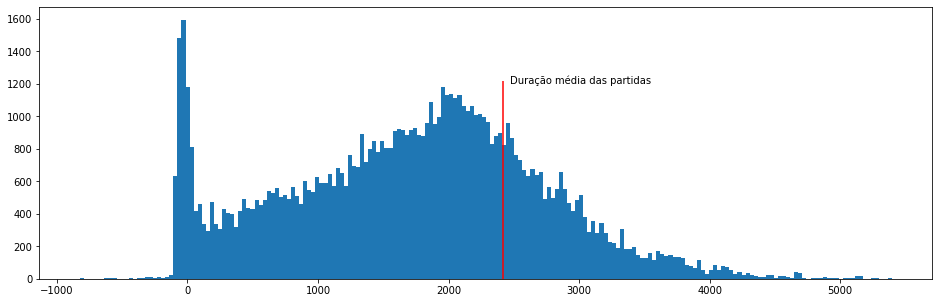

time
78815  1725
78816  1822
78817  1823
78818  1824
78819  1829

In [38]:
df_chat = pd.read_sql_query(
'''
SELECT time
FROM chat
''', conn)

df_match_duration = pd.read_sql_query(
'''
SELECT AVG(duration)
FROM match
''', conn)

df_match_duration = df_match_duration.iloc[0][0]

plt.figure(figsize=(16,5))
plt.hist(df_chat['time'], bins=200)
plt.vlines(df_match_duration, 0, 1220, color='red')
plt.text(df_match_duration+50, 1200, 'Duração média das partidas')
plt.show()
df_chat.tail()

### Consulta: Posição das wards colocadas pelos jogadores
Para esta consulta, selecionamos as coordenadas "x" e "y" do mapa em que as wards observadoras foram 
colocadas pelos jogadores em todas as partidas do nosso banco de dados, agrupamos as posições repetidas e 
somamos a quantidade de vezes que a ward foi posicionada nessas posições. Para isso realizamos uma seleção das 
posições e um "sum" das posições repetidas da tabela "obs" e demos um "group by" na posição "x" e "y".
    A partir dos dados gerados, plotamos um mapa de calor das posições das wards e, no fundo do mapa de calor 
colocamos a imagem do mapa do jogo, sendo possível assim visualizar as posições de wards mais utilizadas pelos 
jogadores nas partidas. Essa análise pode ser muito útil e determinante em uma partida pois comprando-se as sentry wards,
que são as wards responsáveis por revelar as wards observadoras do time inimigo, e posicionando-as nesses locais, 
a chance de encontrar as wards inimigas é maior, o que possibilita detrui-las, e assim reduzir a "visão" do mapa pelo time inimigo.

x    y  count
0  66  130      1
1  66  132      2
2  68  130      2
3  68  132      7
4  70  114      1

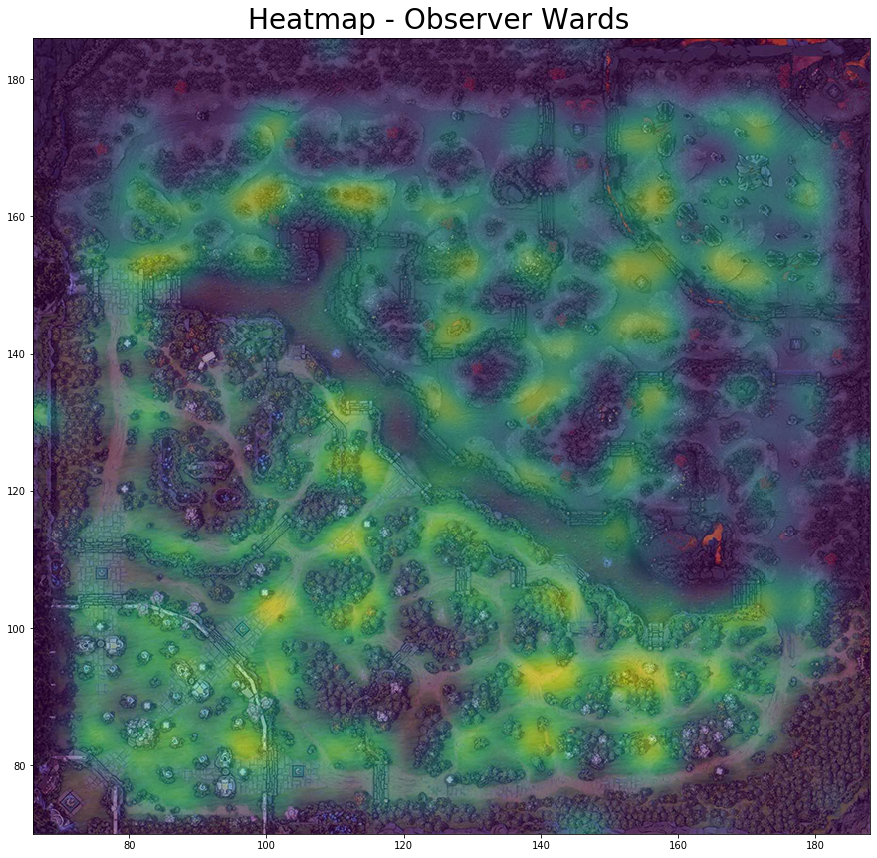

In [36]:
df_obs = pd.read_sql_query(
'''
SELECT x_pos x, y_pos y, sum(obs_count) count 
FROM obs 
GROUP BY x_pos, y_pos
''', conn)

def dota2_heatmap(df, df_img, sizex, sizey, bins, name, title_height):
    img = plt.imread("Minimap_6.88.jpg")
    fig, ax = plt.subplots(figsize=(sizex,sizey))
    fig.suptitle(name, fontsize=28, y=title_height)
    ax.imshow(img, extent=[df_img['x'].min(), df_img['x'].max(), df_img['y'].min(), df_img['y'].max()])
    heatmap, xedges, yedges = np.histogram2d(df['x'], df['y'], bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow(heatmap.T, extent=extent, origin='lower', alpha=0.5, interpolation='bicubic')


dota2_heatmap(df_obs, df_obs, 15, 15, 35, 'Heatmap - Observer Wards', 0.9)
df_obs.head()

### Consulta: Posição nas lanes de acordo com cada time em uma partida específica

Para esta consulta fizemos duas seleções, uma para o time "Radiant" e outro para o "Dire", com o intuito 
de observar o posicionamento dos heróis em cada uma das equipes em uma partida de longa duração, específica da base de dados. 
Selecionamos as posições "x" e "y" visitadas por cada herói na partida e somamos as posições repetidas 
guardando-as em uma coluna separada, para assim mapearmos as posições mais visitadas pelos jogadores.
Para identificarmos de qual time cada jogador pertence, utilizamos a informação do atributo "pos_player_slot", 
que identica de 0 a 4 os jogadores do time "Radiant" e de 128 a 132 os jogadores do time "Scourge".
    Para melhor visualização das posições mais visitadas pelos jogadores de cada time, plotamos dois mapas 
de calor com os dados, um para cada time.

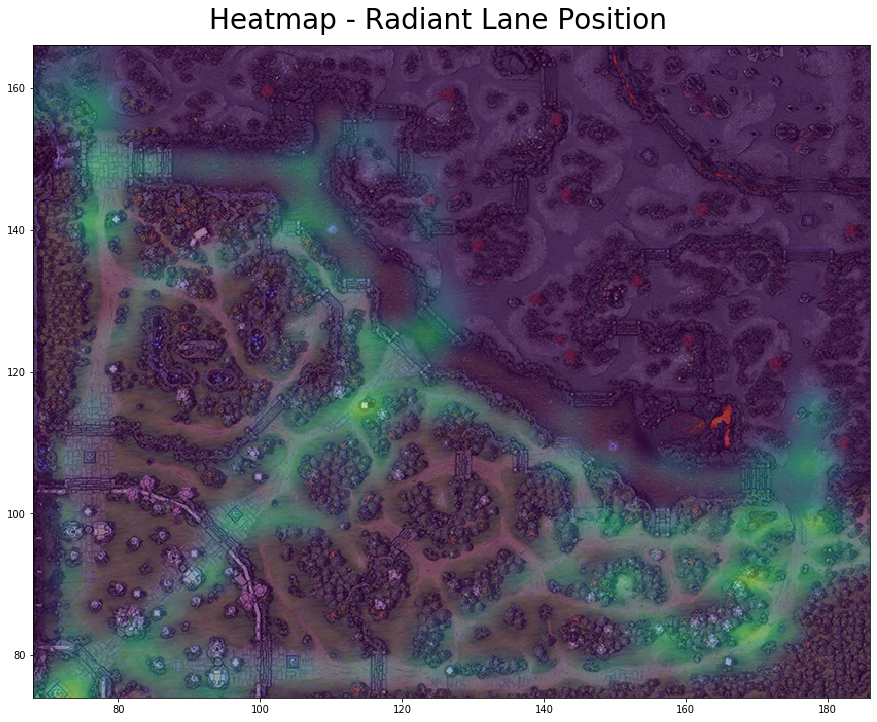

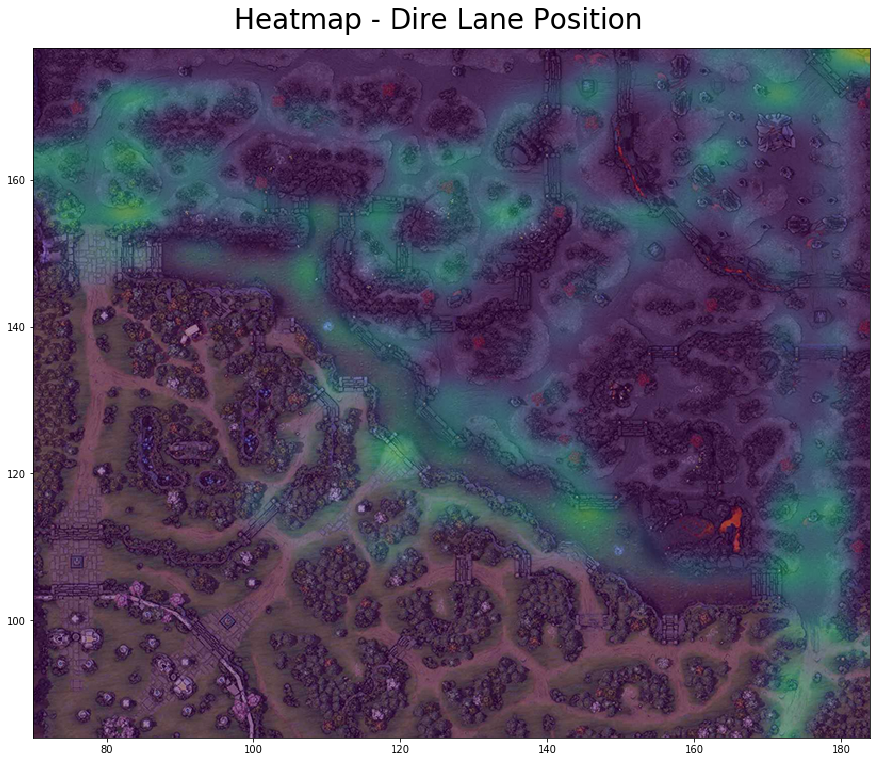

In [37]:
df_lane_radiant = pd.read_sql_query(
'''
SELECT x_pos x, y_pos y, sum(pos_count) count
FROM lane_pos 
WHERE pos_player_slot < 5 AND pos_match_id = 2001310590
GROUP BY x_pos, y_pos
''', conn)

dota2_heatmap(df_lane_radiant, df_obs, 15, 15, 35, 'Heatmap - Radiant Lane Position', 0.84)

df_lane_dire = pd.read_sql_query(
'''
SELECT x_pos x, y_pos y, sum(pos_count) count
FROM lane_pos 
WHERE pos_player_slot > 127 AND pos_match_id = 2001310590
GROUP BY x_pos, y_pos
''', conn)


dota2_heatmap(df_lane_dire, df_obs, 15, 15, 35, 'Heatmap - Dire Lane Position', 0.86)

## Junção de duas relações

### Consulta: Estatísticas relacionadas ao resultado das partidas

Essa consulta mostra a média de várias estatísticas dos jogadores, de acordo com o resultado das partidas, tanto para a vitória quanto para a derrota, com o objetivo de visualizar e comparar características e estratégias individuais e coletivas que influenciam um time à vitória ou à derrota.

In [34]:
df_radiant = pd.read_sql_query(
'''
SELECT REPLACE(REPLACE(radiant_win,0,"Derrota"),1,"Vitória") Resultado , (AVG(kills) - AVG(deaths)) "Saldo de Vítimas", 
AVG(hero_healing), AVG(tower_damage), AVG(hero_damage), AVG(gold_per_min), AVG(gold_spent), AVG(xp_per_min), AVG(denies), AVG(last_hits), AVG(level)
FROM match AS M
INNER JOIN(
    SELECT player_match_id, player_slot, kills, deaths, hero_healing, tower_damage, hero_damage, gold_per_min, xp_per_min, denies, last_hits, level, gold_spent
    FROM player
    WHERE player_slot < 5
) AS P
ON M.match_id = P.player_match_id
GROUP BY Resultado
ORDER BY Resultado DESC
''', conn)

df_radiant

Resultado  Saldo de Vítimas  AVG(hero_healing)  AVG(tower_damage)  \
0   Vitória          2.607297         543.619459        2034.888378   
1   Derrota         -3.519708         342.292409         418.122628   

   AVG(hero_damage)  AVG(gold_per_min)  AVG(gold_spent)  AVG(xp_per_min)  \
0      12766.471216         468.944189     15396.437162       488.300946   
1      10321.974745         338.546715     11448.249635       380.027737   

   AVG(denies)  AVG(last_hits)  AVG(level)  
0     4.900405      129.585405   18.460405  
1     4.375182      115.694891   16.474307

### Consulta: Quais são os itens mais usados no jogo?

Esta consulta verifica os itens utilizados pelos jogadores em todas as partidas com seus respectivos nomes, e soma a quantidade dos itens comprados em todas as partidas agrupando pelo nome de cada item, com o objetivo de verificar quais são os itens utilizáveis mais populares entre os jogadores.

In [33]:
df_mais_comprado = pd.read_sql_query(
'''
SELECT name, sum(item_count) total
FROM item_uses AS USES
INNER JOIN (
    SELECT name
    FROM item_ids
) AS IDS
ON USES.item_name = IDS.name
GROUP BY USES.item_name
ORDER BY total DESC
''', conn)

df_mais_comprado.head(10)

name   total
0     phase_boots  454569
1          bottle  382990
2           blink  199839
3        tpscroll  184620
4    power_treads  183446
5           tango  101080
6      magic_wand   98870
7    arcane_boots   92888
8          armlet   85297
9  ward_dispenser   58573

### Consulta: Ordem das ações mais executadas no jogo

Esta consulta busca ordenar os comandos mais executados pelos jogadores em todas as partidas, representado em ordem decrescente. Para isso, coletamos os comandos executados por cada jogador individualmente e realizamos uma contagem em cima dos dados, agrupando por nome do comando.

In [32]:
df_actions = pd.read_sql_query(
'''
SELECT name, sum(action_count) action_count
FROM actions AS A
INNER JOIN(
    SELECT name, id
    FROM order_types
) AS O
ON A.action_id = O.id
GROUP BY name
ORDER BY action_count DESC
''', conn)

df_actions.head(10)

name  action_count
0  DOTA_UNIT_ORDER_MOVE_TO_POSITION     114197086
1     DOTA_UNIT_ORDER_ATTACK_TARGET      16910436
2    DOTA_UNIT_ORDER_CAST_NO_TARGET       3879493
3    DOTA_UNIT_ORDER_MOVE_TO_TARGET       2415730
4     DOTA_UNIT_ORDER_HOLD_POSITION       2179134
5       DOTA_UNIT_ORDER_CAST_TARGET       1836447
6       DOTA_UNIT_ORDER_ATTACK_MOVE       1656292
7     DOTA_UNIT_ORDER_CAST_POSITION       1655179
8     DOTA_UNIT_ORDER_PURCHASE_ITEM        901305
9     DOTA_UNIT_ORDER_TRAIN_ABILITY        498213

## Junção de três ou mais relações

### Consulta: Taxa de vitórias por herói

O objetivo desta consulta é verificar os heróis com maior taxa de vitória em todas partidas, utilizando o nome como fator de agrupamento dos dados. Para evitar heróis que estiveram pouco presente nas partidas, decidimos estabelecer que só entrariam heróis com mais de 100 partidas na base de dados, assim evitando dados enviesados, por exemplo, se um herói só foi escolhido uma vez e ganhou, sua taxa de vitória seria de 100%, mas isso não necessariamente condiz com a realidade. Para conseguirmos realizar esta consulta tivemos de realizar junção de três relações, tabelas "match", "player" e "heroes", e para calcular a taxa de vitória fizemos a soma do número de partidas vencedoras do herói dividido pelo número de partidas em que o herói foi selecionado.

In [31]:
df_winner_heroes = pd.read_sql_query(
'''
SELECT localized_name 'Hero Name', CAST(count(radiant_win) AS float)/CAST(M.num_matches AS float) WinRate
FROM match
INNER JOIN(
    SELECT player_match_id, localized_name, num_matches
    FROM player P
    INNER JOIN(
        SELECT hero_id, localized_name, num_matches
        FROM heroes
        INNER JOIN(
            SELECT hero_id n_id, count(hero_id) num_matches
            FROM player
            GROUP BY hero_id
        ) AS NUMP
        ON heroes.hero_id = NUMP.n_id
    ) AS H
    ON P.hero_id = H.hero_id
    WHERE player_slot < 5
) AS M
ON match_id = player_match_id
WHERE M.num_matches > 100
GROUP BY localized_name
ORDER BY WinRate DESC
''', conn)

df_winner_heroes.head(20)

Hero Name   WinRate
0            Enigma  0.568493
1             Razor  0.566038
2            Medusa  0.565217
3         Alchemist  0.561290
4       Bloodseeker  0.550898
5            Weaver  0.547619
6       Wraith King  0.543624
7            Kunkka  0.539535
8         Clockwerk  0.538813
9              Lion  0.533141
10          Slardar  0.533074
11             Luna  0.531646
12           Mirana  0.531056
13     Witch Doctor  0.530259
14  Vengeful Spirit  0.529412
15          Invoker  0.527473
16          Undying  0.526316
17         Silencer  0.525680
18    Winter Wyvern  0.524706
19     Shadow Fiend  0.522897

### Consulta: Herói mais escolhido em partidas rankeadas

As partidas rankeadas possuem como característica um ambiente mais competitivo entre os times, pois o resultado da partida gera pontos que classificam cada jogador individualmente em um ranking de habilidades, onde o time ganhador e os jogadores que mais se sobressaíram podem subir de nível e ser melhor classificados de acordo com suas habilidades. Nesses tipos de partidas, as estratégias de equipe são mais bem pensadas e os jogadores escolhem heróis que julgam ter melhores performances individuais ou em equipe, consequentemente, o nível de dificuldade da partida aumenta.
Diante deste contexto, esta consulta busca classificar a popularidade de escolha dos heróis para partidas rankeadas, do mais para o menos popular, e soma suas aparições nas partidas para melhor visualização.

In [29]:
df_most_picked_ranked = pd.read_sql_query(
'''
SELECT mode_name Modo, HR.hero_name Herói, count(HR.hero_name) Aparições
FROM match AS M
INNER JOIN(
    SELECT id, name mode_name 
    FROM lobby_type
    WHERE name = 'lobby_type_ranked'
) AS L
ON M.lobby_type = L.id
INNER JOIN(
    SELECT player_match_id, hero_id, hero_name
    FROM player AS P
    INNER JOIN(
        SELECT hero_id id, localized_name hero_name
        FROM heroes
    )AS H
    ON P.hero_id = H.id
)as HR
ON M.match_id = HR.player_match_id
GROUP BY HR.hero_name
ORDER BY Aparições DESC
''', conn)

df_most_picked_ranked.head()

Modo         Herói  Aparições
0  lobby_type_ranked  Shadow Fiend        513
1  lobby_type_ranked    Windranger        464
2  lobby_type_ranked       Invoker        339
3  lobby_type_ranked          Tusk        320
4  lobby_type_ranked   Earthshaker        317

### Consulta: Last hits e Denies por Herói

Para os heróis conseguirem acumular dinheiro é necessário dar o golpe derradeiro em criaturas inimigas, criaturas neutras do mapa ou em heróis inimigos, esse golpe é chamado de "last hit". A forma de evitar que o herói inimigo dê o last hit em criaturas do seu time é o "deny", golpe derradeiro desferido pelo herói à criatura do próprio time, o que só pode ser feito se a criatura estiver com pouquíssima vida. No início do jogo, conseguir dar o last hit nas criaturas inimigas é fundamental para acumular dinheiro mais rapidamente e, por consequência, ter acesso a itens mais caros antes da equipe inimiga, o que pode garantir vantagem em batalhas.

Nesta consulta selecionamos os heróis e suas respectivas médias de last hits e denies por partida a partir do número total de partidas da nossa base de dados, e ordenamos de forma decrescente a média de last hits dos heróis identificados aqui pelo nome, para demonstrar aqueles que possuem melhor desempenho na média.

In [28]:
df = pd.read_sql_query(
'''
SELECT localized_name "Hero Name", sum(last_hits)/count(localized_name) "Total Last Hits", sum(denies)/count(localized_name) "Total Denies"
FROM match AS M
INNER JOIN(
    SELECT id, name mode_name 
    FROM lobby_type
    WHERE name = 'lobby_type_ranked'
) AS L
ON M.lobby_type = L.id
INNER JOIN(
    SELECT player_match_id, localized_name, last_hits, denies
    FROM player P
    INNER JOIN(
        SELECT hero_id id ,localized_name
        FROM heroes
    ) AS H
    ON P.hero_id = H.id
) AS M
ON match_id = player_match_id
GROUP BY "Hero Name"
ORDER BY "Total Last Hits" DESC
''', conn)

df.head(10)

Hero Name  Total Last Hits  Total Denies
0         Anti-Mage              281            10
1            Medusa              272             7
2         Alchemist              252             3
3      Shadow Fiend              245            14
4  Nature's Prophet              235             1
5        Naga Siren              224             4
6              Luna              222             7
7        Juggernaut              219             8
8      Ember Spirit              214             5
9        Gyrocopter              212             9

### Consulta: Proporção de Vítimas e Assistencias por Mortes por Herói

Uma forma de analisar o desempenho dos heróis na partida é analisar o seu KDA (kill, deaths, assists), quanto maior o seu KDA, melhor desempenho o herói teve na partida. Para se calcular esse índice devemos seguir essa fórmula: 

KDA = $(kills + assists)/MAX(1,deaths).$

Nesta consulta, calculamos o KDA de cada herói e fizemos a média em todas as partidas da base, e para melhor visualização dos melhores heróis de acordo com esse índice, ordenamos de forma descrescente a lista com todos os heróis do banco.

In [27]:
df_kda = pd.read_sql_query(
'''
SELECT hero_name 'Hero Name', sum(kills) Kills, sum(assists) Assists, sum(deaths) Deaths, (CAST(sum(kills) AS float)+CAST(sum(assists) AS float))/CAST(sum(deaths) AS float) "KDA Ratio"
FROM player AS P
INNER JOIN(
    SELECT hero_id id, localized_name hero_name
    FROM heroes
) AS H
ON P.hero_id = H.id
GROUP BY hero_id
ORDER BY "KDA Ratio" DESC
''', conn)

df_kda.head()

Hero Name  Kills  Assists  Deaths  KDA Ratio
0    Spectre   2216     4044    1493   4.192900
1       Zeus   2689     4862    2050   3.683415
2     Medusa   1044     1828     848   3.386792
3     Weaver   1559     1868    1058   3.239130
4  Necrophos   2575     4338    2137   3.234909

### Consulta: Dano médio em torres de cada herói

O objetivo do jogo é destruir a torre "ancient" do time inimigo, para isso, é necessário que, no mínimo, todas as torres inimigas de uma das lanes (bot, mid, top) do mapa sejam completamente destruídas.
		
Então um fator que pode ser determinante para se vencer a partida é possuir heróis que desfiram golpes e magias que causem grande quantidade de dano nas torres inimigas.

Nesta consulta buscamos identificar os heróis que causam mais dano em média nas torres inimigas, e para enriquecer as características da consulta e dos heróis, selecionamos o atributo primário do herói (força, agilidade ou inteligência) e também sua forma de ataque (melee ou ranged).

In [26]:
df_kda = pd.read_sql_query(
'''
SELECT hero_name "Hero Name", primary_attr "Primary Attribute", attack_type "Attack Type", AVG(tower_damage) "Average Tower Damage per Match"
FROM player AS P
INNER JOIN(
    SELECT hero_id id, localized_name hero_name, primary_attr, attack_type
    FROM heroes
)AS H
ON P.hero_id = H.id
GROUP BY hero_id
ORDER BY "Average Tower Damage per Match" DESC
''', conn)

df_kda.head(20)

Hero Name Primary Attribute Attack Type  \
0              Lycan               str       Melee   
1        Terrorblade               agi       Melee   
2        Drow Ranger               agi      Ranged   
3             Clinkz               agi      Ranged   
4       Shadow Fiend               agi      Ranged   
5         Lone Druid               agi      Ranged   
6               Luna               agi      Ranged   
7          Anti-Mage               agi       Melee   
8   Nature's Prophet               int      Ranged   
9         Juggernaut               agi       Melee   
10             Meepo               agi       Melee   
11     Death Prophet               int      Ranged   
12     Troll Warlord               agi      Ranged   
13         Alchemist               str       Melee   
14              Tiny               str       Melee   
15        Windranger               int      Ranged   
16            Medusa               agi      Ranged   
17  Templar Assassin               agi      Ranged   
18              Sven               str       Melee   
19            Weaver               agi      Ranged   

    Average Tower Damage per Match  
0                      3970.547368  
1                      3458.318681  
2                      3034.726368  
3                      3011.193333  
4                      2936.516507  
5                      2926.788732  
6                      2861.107595  
7                      2808.364066  
8                      2734.181373  
9                      2707.572881  
10                     2598.047059  
11                     2559.928571  
12                     2549.804348  
13                     2481.825806  
14                     2411.162338  
15                     2383.323926  
16                     2333.720497  
17                     2162.416938  
18                     2105.844156  
19                     2061.166667